In [48]:
import pandas as pd

In [49]:
df = pd.read_json('../ENLP/data/News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


### E Dataset A
The dataset contains around 210k news headlines, obtained from an American Progressive news website -- HuffPostof subjecting to total 42 categories. The columns in the dataset are link, headline, category, short_desctiption, authors, date.

For the topic of Comparison Research of Multi-Model Performance on News Categorical Classification, the headline, short_description, and category will be kept. At the same time, integrate the former two into one context.
(Maybe: for different purpose, examine which doing well with only headline, and why)

In [50]:
# drop columns

# integrate headline and short_description
df['text'] = df['headline'] + '. ' + df['short_description']
# split the data according to the date, before 2018-05-01
df_18 = df[df['date'] < '2018-05-01']
df_22 = df[df['date'] >= '2018-05-01']
df.drop(['headline', 'short_description', 'authors', 'link', 'date'], inplace=True, axis=1)
df_18.drop(['headline', 'short_description', 'authors', 'link', 'date'], inplace=True, axis=1)
df_22.drop(['headline', 'short_description', 'authors', 'link', 'date'], inplace=True, axis=1)
df.head()

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_10606/2550711938.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.drop(['headline', 'short_description', 'authors', 'link', 'date'], inplace=True, axis=1)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_10606/2550711938.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22.drop(['headline', 'short_description', 'authors', 'link', 'date'], inplace=True, axis=1)


,category,text
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li..."
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...


In [51]:
print(f'number of total data: {len(df)}')
print(f'number of data before 2018-05-01: {len(df_18)}')
print(f'number of data after 2018-05-01: {len(df_22)}')

number of total data: 209527
number of data before 2018-05-01: 199465
number of data after 2018-05-01: 10062


Due to the reversion of the website, there are about 200k headlines between 2012 and May 2018 and 10k headlines between May 2018 and 2022, which is unbalancing. (But has no influence to the time series irrelavent topic) 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  209527 non-null  object
 1   text      209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [53]:
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

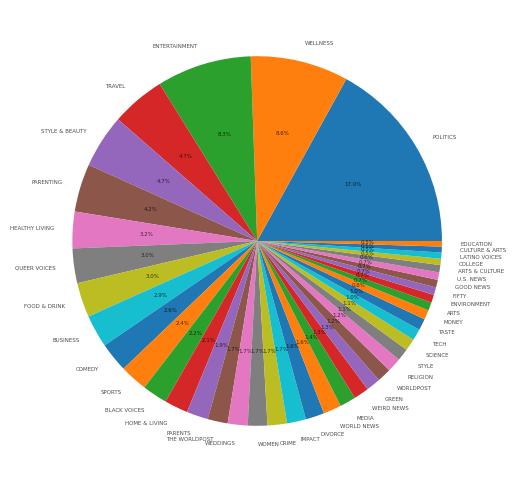

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
#plt.title('Before the Integration')
plt.show()

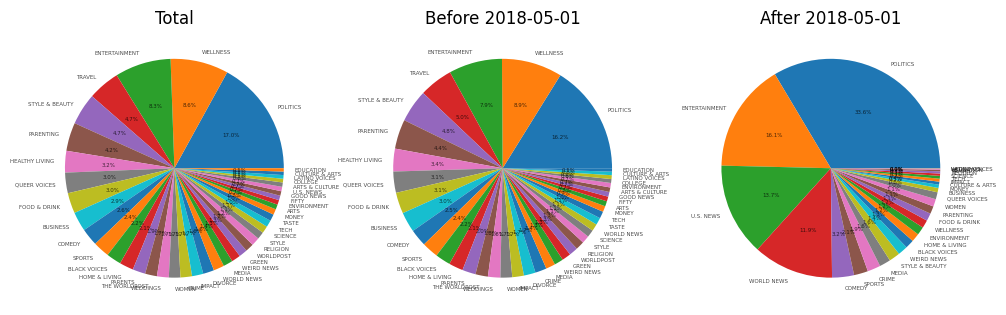

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
plt.title('Total')
plt.subplot(1, 3, 2)
plt.pie(x=df_18.category.value_counts(), labels=df_18.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
plt.title('Before 2018-05-01')
plt.subplot(1, 3, 3)
plt.pie(x=df_22.category.value_counts(), labels=df_22.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
plt.title('After 2018-05-01')
plt.show()

In [56]:
replace_dict = {
    "HEALTHY LIVING": "WELLNESS",
    "QUEER VOICES": "GROUPS VOICES",
    "COMEDY": "ENTERTAINMENT",
    "BUSINESS": "BUSINESS & FINANCES",
    "PARENTS": "PARENTING",
    "BLACK VOICES": "GROUPS VOICES",
    "THE WORLDPOST": "WORLD NEWS",
    "STYLE": "STYLE & BEAUTY",
    "GREEN": "ENVIRONMENT",
    "TASTE": "FOOD & DRINK",
    "WORLDPOST": "WORLD NEWS",
    "SCIENCE": "SCIENCE & TECH",
    "TECH": "SCIENCE & TECH",
    "MONEY": "BUSINESS & FINANCES",
    "ARTS": "ARTS & CULTURE",
    "COLLEGE": "EDUCATION",
    "LATINO VOICES": "GROUPS VOICES",
    "CULTURE & ARTS": "ARTS & CULTURE",
    "FIFTY": "MISCELLANEOUS",
    "GOOD NEWS": "MISCELLANEOUS"}
df.category = df.category.replace(replace_dict)
df_18.category = df_18.category.replace(replace_dict)
df_22.category = df_22.category.replace(replace_dict)

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_10606/1603212455.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.category = df_18.category.replace(replace_dict)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_10606/1603212455.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22.category = df_22.category.replace(replace_dict)


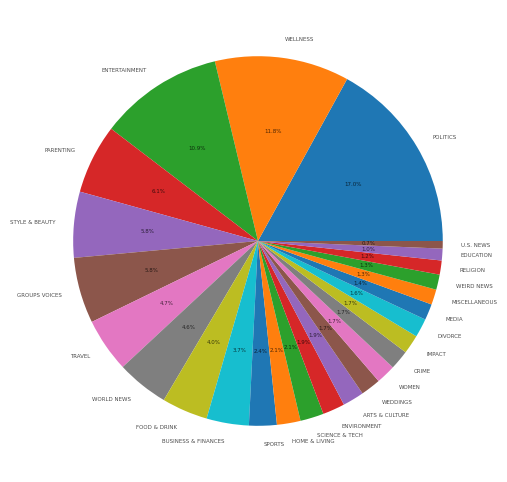

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
#plt.title('Before the Integration')
plt.show()

In [58]:
len(df['category'].value_counts())

26

In [38]:
ctk = df['category'].value_counts()[:10].index.values
df[df['category'].isin(ctk)]

,category,text
2,ENTERTAINMENT,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
7,WORLD NEWS,Puerto Ricans Desperate For Water After Hurric...
9,WORLD NEWS,Biden At UN To Call Russian War An Affront To ...
10,WORLD NEWS,World Cup Captains Want To Wear Rainbow Armban...
...,...,...
209509,BUSINESS & FINANCES,Walmart Waving Goodbye To Some Greeters. After...
209510,BUSINESS & FINANCES,"At World Economic Forum, Fear of Global Contag..."
209511,BUSINESS & FINANCES,Positive Customer Experience: What's the Retur...
209512,ENTERTAINMENT,"Sundance, Ice-T, and Shades of the American Ra..."


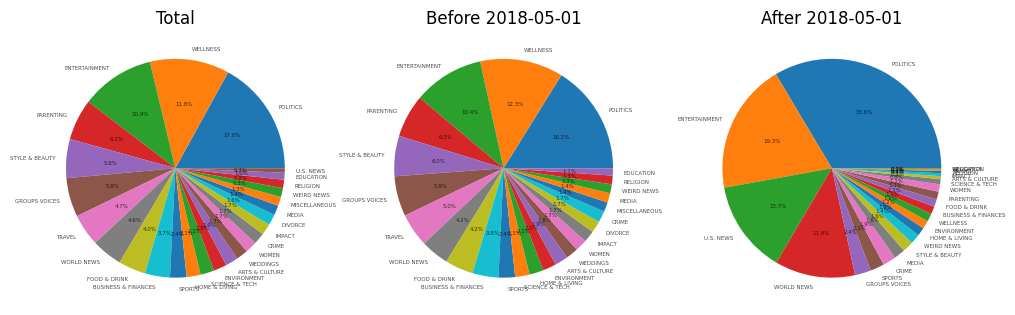

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
plt.title('Total')
plt.subplot(1, 3, 2)
plt.pie(x=df_18.category.value_counts(), labels=df_18.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
plt.title('Before 2018-05-01')
plt.subplot(1, 3, 3)
plt.pie(x=df_22.category.value_counts(), labels=df_22.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 4, 'alpha':.7})
plt.title('After 2018-05-01')
plt.show()

The pie charts shows that the number of each category is inbalancing, especially after May 2018, almost one third headlines are POLITICS.
Considering the computional cost, I decide to keep the top ten categories after merging some similar categories, for instance, PARENTS and PARENTING. For data balancing, randomly drop about half of the top 3 categories with far supassing 10k records. To further clean the text data, unusual characters like emojis, punctuations, links, etc. At last, drop duplicated rows.

In [40]:
categories_to_keep = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'PARENTING', 'STYLE & BEAUTY', 'GROUPS VOICES', 'TRAVEL', 'WORLD NEWS', 'FOOD & DRINK', 'BUSINESS & FINANCES']
df = df[df['category'].isin(categories_to_keep)]

In [41]:
# Randomly select 20000 row indices from the part of the DataFrame where category == "POLITICS"
plt_to_remove = df[df['category'] == 'POLITICS'].sample(20000, random_state=1).index
wln_to_remove = df[df['category'] == 'WELLNESS'].sample(10000, random_state=2).index
ent_to_remove = df[df['category'] == 'ENTERTAINMENT'].sample(10000, random_state=3).index

In [42]:
plt_to_remove

Int64Index([ 46904,  90109,  74422,  13027,  57851, 130432,  53314,  45453,
              7898,  20566,
            ...
             12363,  88167,  62788,  66572,  97244,  23892,  52997,  56109,
             63089,  86538],
           dtype='int64', length=20000)

In [43]:
# Drop these rows
df = df.drop(plt_to_remove)
df = df.drop(wln_to_remove)
df = df.drop(ent_to_remove)

In [44]:
df['category'].value_counts()

POLITICS               15602
WELLNESS               14639
ENTERTAINMENT          12762
PARENTING              12746
STYLE & BEAUTY         12068
GROUPS VOICES          12060
TRAVEL                  9900
WORLD NEWS              9542
FOOD & DRINK            8436
BUSINESS & FINANCES     7748
Name: category, dtype: int64

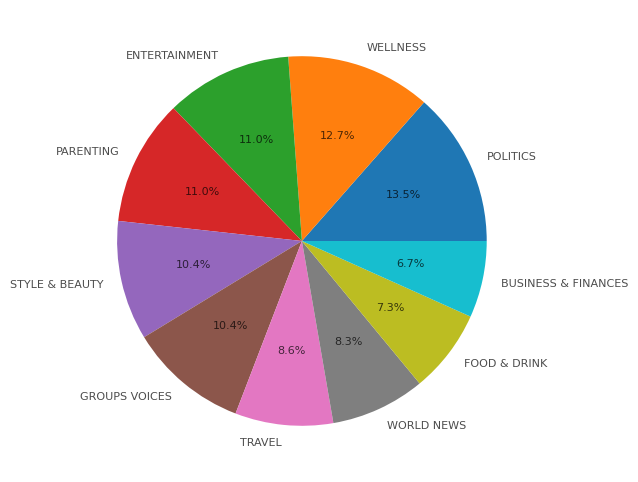

In [47]:
plt.figure(figsize=(8, 6))
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 8, 'alpha':.7})
#plt.title('Final Dataset after Data Processing')
plt.show()

In [21]:
# save the data
df.to_csv('./news_10_category.csv', index=False)

In [22]:
import pandas as pd
df = pd.read_csv('./news_10_category.csv')

In [23]:
df[df.duplicated()]

,category,text
2306,WORLD NEWS,Netanyahu Holds Solid Lead In Israeli Election...
8558,PARENTING,The Funniest Tweets From Parents This Week. Ki...
9006,ENTERTAINMENT,"With This 'Shape Of Water' Clip, You'll Fall F..."
9034,POLITICS,Abortion Isn’t Main Reason More Republicans St...
9049,PARENTING,35 Hilarious Holiday Card Outtakes. These kids...
...,...,...
114585,STYLE & BEAUTY,"Whitney Houston Dies, Her Glittering Style Rem..."
114594,STYLE & BEAUTY,BAFTAs 2012 Red Carpet Roundup: Understated Ch...
114653,GROUPS VOICES,"'Black Love' Wedding Announcements (PHOTOS). ""..."
115035,GROUPS VOICES,"'Black Love' Wedding Announcements (PHOTOS). ""..."


In [24]:
df.drop_duplicates(inplace=True)
len(df)

115252

##### Data Cleaning

In [25]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TEXT
import re
import string
from nltk.corpus import stopwords
MAX_LEN = 0
def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

# remove stopwords
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stop = stopwords.words("english")
    stop.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
                 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ha', 'wa'])
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split(' ')
    no_words = [w for w in words if w not in stop]
    sentence = " ".join(no_words)

    return sentence


def del_less_than_10_words(text):
    text = text.strip()
    if len(text.split(' ')) < 10: #remove sentences with less than 3 words
        return None
    else:
        return text
    
    # Lemmatize the text
    
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the sentence
    word_list = word_tokenize(text)
    lem = WordNetLemmatizer()
    global MAX_LEN
    # Lemmatize list of words and join
    lemmatized = [lem.lemmatize(word) for word in word_list]
    lemmatized_output = [token for token in lemmatized if token!='']
    if len(lemmatized_output) == 0:
        return 'NA'
    elif len(lemmatized_output)>MAX_LEN:
        MAX_LEN = len(lemmatized_output)
    return " ".join(lemmatized_output)

[nltk_data] Downloading package wordnet to /Users/yaoyao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yaoyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
df['text'] = (df['text'].apply(strip_emoji)
                .apply(strip_all_entities)
                .apply(clean_hashtags)
                .apply(filter_chars)
                .apply(remove_mult_spaces)
                .apply(lemmatize_text)
                .apply(remove_stopwords)
                .apply(del_less_than_10_words))

KeyboardInterrupt: 

In [ ]:
df.isna().sum()

category        0
text        14032
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df)

101220

In [ ]:
df[df['text'].duplicated(keep='first')]

,category,text
5515,WORLD NEWS,rest world showed march life protester across ...
41914,STYLE & BEAUTY,laundry list read relive love weekend lifestyl...
42745,STYLE & BEAUTY,laundry list read relive love weekend lifestyl...
45920,PARENTING,funniest parenting tweet mom dad said twitter ...
93021,STYLE & BEAUTY,right way care sweater winter always seems one...
97159,PARENTING,key parenting well even youre stressed one per...
98564,PARENTING,42 amazing nursery kid room designed inspire l...
99087,BUSINESS & FINANCES,state drink beer 247 wall st total consumption...
103270,TRAVEL,vietjetair vietnamese airline fined inflight b...
103527,STYLE & BEAUTY,marilyn monroe iconic hair time photo hollywoo...


In [ ]:
df.drop_duplicates(subset=['text'], inplace=True)
len(df)

101200

In [ ]:
df.isna().sum()

category    0
text        0
dtype: int64

In [ ]:
df.shape[0]

101200

In [ ]:
# sentiment analysis using vader for each news
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['sa'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df.head()

,category,text,sa
0,ENTERTAINMENT,23 funniest tweet cat dog week sept 1723 dog d...,0.5574
1,PARENTING,funniest tweet parent week sept 1723 accidenta...,0.3400
2,WORLD NEWS,puerto ricans desperate water hurricane fionas...,-0.3182
3,WORLD NEWS,biden un call russian war affront body charter...,-0.9493
4,WORLD NEWS,world cup captain want wear rainbow armband qa...,0.2732


In [ ]:
# save the data
df.to_csv('./news_10_category_sa.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('./news_10_category_sa.csv')

In [ ]:
df.head()

,category,text,sa
0,ENTERTAINMENT,23 funniest tweet cat dog week sept 1723 dog d...,0.5574
1,PARENTING,funniest tweet parent week sept 1723 accidenta...,0.3400
2,WORLD NEWS,puerto ricans desperate water hurricane fionas...,-0.3182
3,WORLD NEWS,biden un call russian war affront body charter...,-0.9493
4,WORLD NEWS,world cup captain want wear rainbow armband qa...,0.2732


In [ ]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

Empty DataFrame
Columns: [category, text, sa]
Index: []


In [ ]:
df.dropna(inplace=True)
len(df)

101200

In [ ]:
# save the data
df.to_csv('./news_10_category_sa.csv', index=False)

### Sample a Small Dataset with 6k records

number of data: 5761


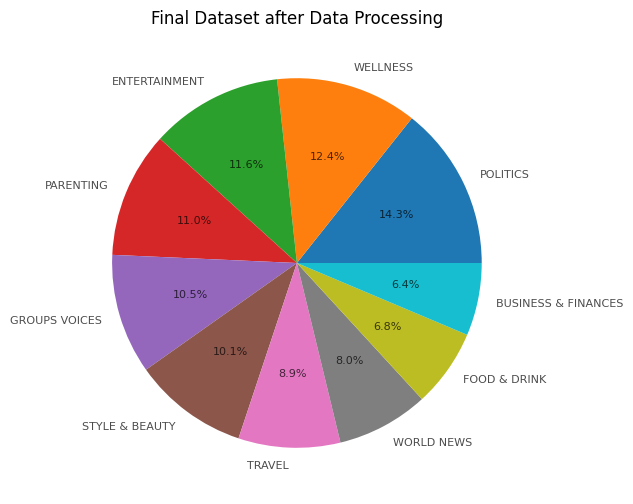

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./news_10_category_sa.csv')
sample_df = df.sample(frac=0.05, random_state=42)
print(f'number of data: {len(sample_df)}')
plt.figure(figsize=(12, 6))
plt.pie(x=sample_df.category.value_counts(), labels=sample_df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 8, 'alpha':.7})
plt.title('Final Dataset after Data Processing')
plt.show()
sample_df.to_csv('./news_10_category_sa_6k.csv', index=False)

99th Percentile of Text Lengths: 40.0


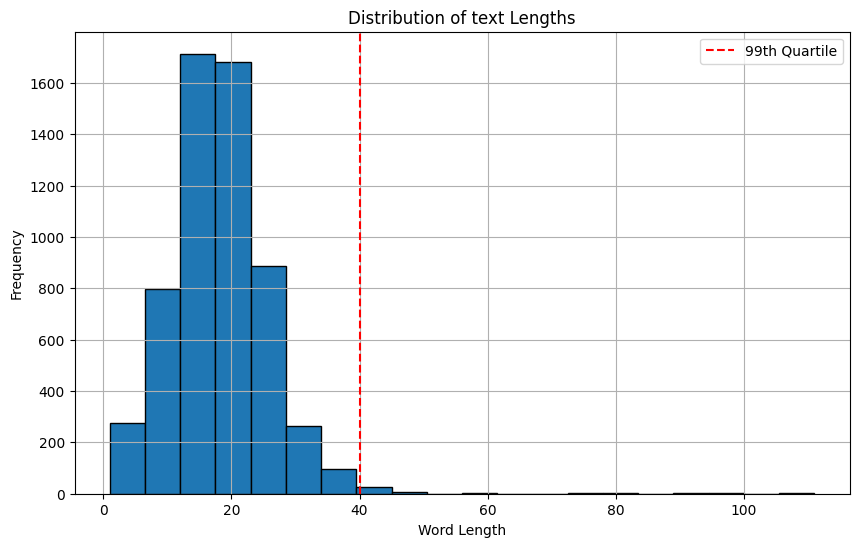

In [ ]:
# Plotting the histogram
import numpy as np
import matplotlib.pyplot as plt
def get_max_length(df):
    length_list = []
    for index, row in df.iterrows():
        length_list.append(len(row['text'].split(' ')))
    return length_list, np.percentile(length_list, 99.4)
df = sample_df
length_list, percentile_99 = get_max_length(df)
plt.figure(figsize=(10, 6))
plt.hist(length_list, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Find the 98th percentile
# Adding a vertical line for the 98th quartile
print(f"99th Percentile of Text Lengths: {percentile_99}")
plt.axvline(x=percentile_99, color='red', linestyle='--', label='99th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
# real max length
MAX_LEN

132

In [ ]:
MAX_LEN = int(percentile_99)
MAX_LEN

40

In [ ]:
import pickle
def save_data(name, data):
    with open(name, 'wb') as f:
        pickle.dump(data, f)
        f.close()
def load_data(name):
    return pickle.load(open(name, 'rb'))

In [ ]:
save_data('X_6k.h5', df['text'])
save_data('y_6k.h5', df['category'])

In [ ]:
# load the data
X = load_data('X_6k.h5')
y = load_data('y_6k.h5')
print(f'X shape: {X.shape} \n y shape: {y.shape}')

X shape: (5761,) 
 y shape: (5761,)


In [ ]:
# one-hot encoding y 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_ohe = encoder.fit_transform(np.array(y).reshape(-1, 1))
print(y_ohe.shape)

(5761, 10)


In [ ]:
#
y_ohe[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
import pandas as pd
y_df = pd.DataFrame(y)
y_ohe = pd.get_dummies(y_df)
class_names = y_ohe.columns.tolist()
y_df.head()


,category
57827,PARENTING
92024,STYLE & BEAUTY
86326,PARENTING
31997,POLITICS
6812,WORLD NEWS


In [ ]:
y_ohe.head()

,category_BUSINESS & FINANCES,category_ENTERTAINMENT,category_FOOD & DRINK,category_GROUPS VOICES,category_PARENTING,category_POLITICS,category_STYLE & BEAUTY,category_TRAVEL,category_WELLNESS,category_WORLD NEWS
57827,0,0,0,0,1,0,0,0,0,0
92024,0,0,0,0,0,0,1,0,0,0
86326,0,0,0,0,1,0,0,0,0,0
31997,0,0,0,0,0,1,0,0,0,0
6812,0,0,0,0,0,0,0,0,0,1


##### Split Train and Test

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### DistilBertTokenizer + Dropout(.5)

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel

In [ ]:
bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
save_data('bert_tokenizer.pickle', bert_tokenizer)

In [ ]:
# tokenizer = load_data('bert_tokenizer.pickle')

In [ ]:
def process_tokenizer(tokenizer, text, max_len):
    """
    To unify the length of all tokenized text to max_len, which ensures all inputs have the same length.
    """
    input_ids = []
    attention_masks = []

    encoded_dict = tokenizer.batch_encode_plus(
                        text,
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_token_type_ids = False
                    )
        
    return np.array(encoded_dict['input_ids'])

In [ ]:
X_train_padded = process_tokenizer(bert_tokenizer, X_train, MAX_LEN)
X_val_padded = process_tokenizer(bert_tokenizer, X_val, MAX_LEN)
X_test_padded = process_tokenizer(bert_tokenizer, X_test, MAX_LEN)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
X_train_padded[0]

array([  101,  3666,  2388,  2287,  4036,  2637,  3768,  2729,  8211,
        2655,  3560,  2791, 23358,  2791,  4365,  2075,  2112,  2120,
        2839,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
save_data('bert_X_train_padded.pickle', X_train_padded)
save_data('bert_X_val_padded.pickle', X_val_padded)
save_data('bert_X_test_padded.pickle', X_test_padded)
save_data('bert_y_train.pickle', y_train)
save_data('bert_y_val.pickle', y_val)
save_data('bert_y_test.pickle', y_test)

In [ ]:
X_train_padded.shape, X_val_padded.shape, X_test_padded.shape

((1152, 45), (2304, 45), (2305, 45))

##### DistilBertModel

In [ ]:
from transformers import DistilBertModel, TFAutoModel, TFDistilBertModel, DistilBertConfig

In [ ]:
pre_model = TFAutoModel.from_pretrained('distilbert-base-uncased')
# config distilbert initialization
#config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
#pre_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import AdamWeightDecay
from tensorflow_addons.metrics import F1Score

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
label_num = y_ohe.shape[1]
input_layer = Input(shape=(MAX_LEN,), dtype=tf.int32)
transformer_layer = pre_model(input_layer)[0]
CLS = transformer_layer[:, 0, :]
dropout_1 = Dropout(0.8)(CLS)
output = Dense(label_num, activation='softmax')(dropout_1)
bert_tf = tf.keras.Model(inputs=input_layer, outputs=output)
bert_tf.compile(loss='categorical_crossentropy', 
                optimizer=AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01), 
                metrics=F1Score(num_classes=label_num, average='macro')
)
bert_tf.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 45)]              0         
                                                                 
 tf_distil_bert_model_2 (TFD  TFBaseModelOutput(last_h  66362880 
 istilBertModel)             idden_state=(None, 45, 7            
                             68),                                
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_3   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dropout_60 (Dropout)        (None, 768)               0         
                                                           

##### Train the model

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
EPOCHS = 10
BATCH_SIZE = 128
STEP_PER_EPOCH = len(X_train_padded) // BATCH_SIZE # number of batches in one epoch
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('./model/bert_weights.h5', monitor='val_f1_score', save_best_only=True)
lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 2)

history = bert_tf.fit(X_train_padded, y_train,
                    validation_data=(X_val_padded, y_val),
                    epochs=EPOCHS,
                    steps_per_epoch=STEP_PER_EPOCH,
                    callbacks=[early_stopping, model_checkpoint, lr])


Epoch 1/10
9/9 [==============================] - 72s 8s/step - loss: 5.7791 - accuracy: 0.1007 - val_loss: 4.7342 - val_accuracy: 0.1094 - lr: 0.0100
Epoch 2/10
9/9 [==============================] - 66s 8s/step - loss: 3.9605 - accuracy: 0.1033 - val_loss: 2.7531 - val_accuracy: 0.1272 - lr: 0.0100
Epoch 3/10
9/9 [==============================] - 79s 9s/step - loss: 2.9802 - accuracy: 0.1016 - val_loss: 2.3229 - val_accuracy: 0.1354 - lr: 0.0100
Epoch 4/10
9/9 [==============================] - 68s 8s/step - loss: 2.6919 - accuracy: 0.1137 - val_loss: 2.3073 - val_accuracy: 0.1120 - lr: 0.0100
Epoch 5/10
9/9 [==============================] - 72s 8s/step - loss: 2.5796 - accuracy: 0.0981 - val_loss: 2.3326 - val_accuracy: 0.1120 - lr: 0.0100
Epoch 6/10
9/9 [==============================] - 73s 8s/step - loss: 2.5100 - accuracy: 0.1016 - val_loss: 2.3242 - val_accuracy: 0.0859 - lr: 0.0100
Epoch 7/10
9/9 [==============================] - 72s 8s/step - loss: 2.4773 - accuracy: 0.099

In [ ]:
class_names

['category']

##### Comparing Model Metrics using the History Attribute

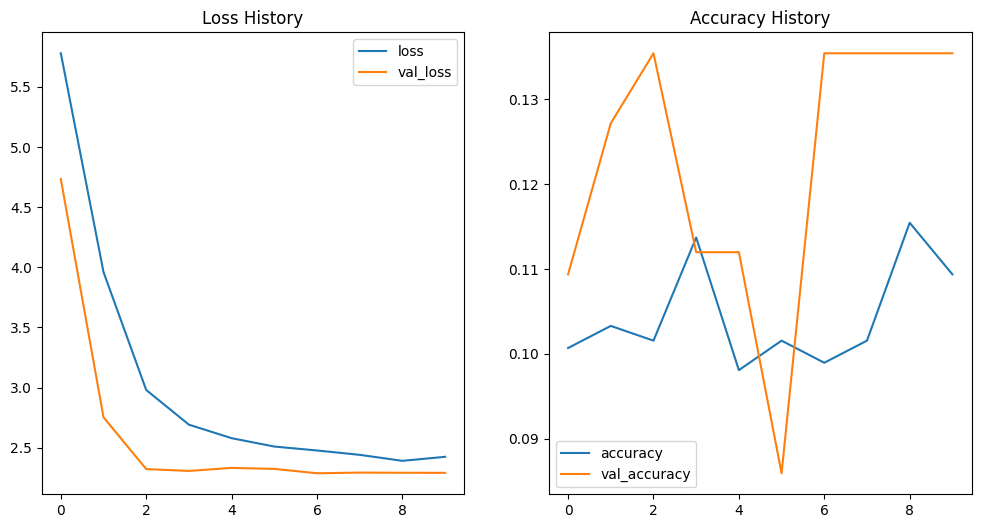

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss History')
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='f1_score')
plt.plot(history.history['val_f1_score'], label='val_f1_score')
plt.legend()
plt.title('F1 score History')
plt.show()

### Inference and Evaluating Model

In [ ]:
y_pred

array([[0.06689116, 0.13874502, 0.07537223, ..., 0.08765098, 0.11493915,
        0.06978193],
       [0.06689115, 0.13874495, 0.07537217, ..., 0.08765103, 0.11493918,
        0.06978194],
       [0.06689116, 0.13874505, 0.07537226, ..., 0.08765098, 0.11493918,
        0.06978186],
       ...,
       [0.06689115, 0.13874507, 0.07537223, ..., 0.08765098, 0.11493915,
        0.06978187],
       [0.06689119, 0.13874508, 0.07537226, ..., 0.08765097, 0.11493915,
        0.06978188],
       [0.06689114, 0.13874495, 0.07537217, ..., 0.0876511 , 0.11493919,
        0.06978194]], dtype=float32)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = bert_tf.predict(X_test_padded)

73/73 [==============================] - 28s 378ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.00      0.00      0.00       254
           2       0.00      0.00      0.00       138
           3       0.00      0.00      0.00       239
           4       0.00      0.00      0.00       285
           5       0.14      1.00      0.24       315
           6       0.00      0.00      0.00       214
           7       0.00      0.00      0.00       219
           8       0.00      0.00      0.00       299
           9       0.00      0.00      0.00       181

    accuracy                           0.14      2305
   macro avg       0.01      0.10      0.02      2305
weighted avg       0.02      0.14      0.03      2305



/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_class

array([5, 5, 5, ..., 5, 5, 5])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


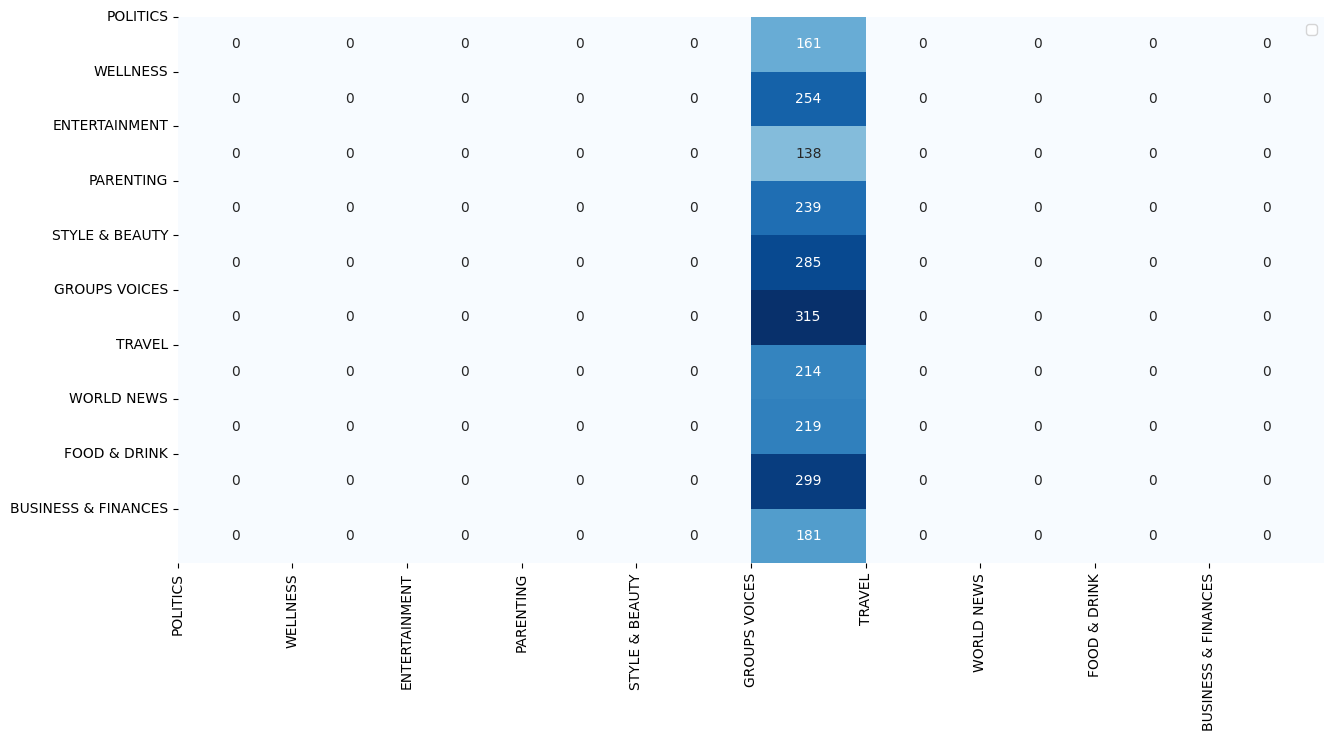

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.tight_layout()
plt.xticks(range(10), class_names, rotation=90)
plt.yticks(range(10), class_names, rotation=0)
plt.legend()

### sample a smaller data set

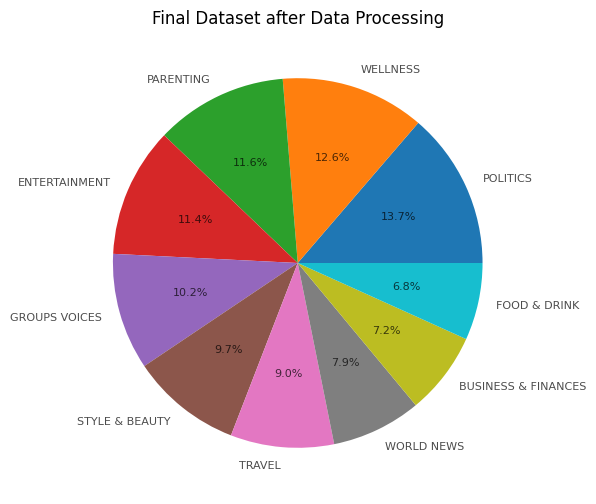

In [ ]:
length_list, percentile_99 = get_max_length(sample_df)
MAX_LEN = int(percentile_99)

In [ ]:
len(sample_df)

5761

In [ ]:
sample_df.to_csv('./news_10_category_cleaned_6k.csv', index=False)

### Train LogisticModel

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('./news_10_category_cleaned_6k.csv')

In [ ]:
categories = df['category'].unique()

In [ ]:
X = df['text']
y = df['category']

In [ ]:
# transform the categories to numbers by sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([4, 6, 4, ..., 1, 8, 6])

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X)

In [ ]:
vectors.shape

(5761, 17601)

In [ ]:
save_data('tfidf_vectors.pickle', vectors)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [ ]:
import numpy as np

In [ ]:
X_train.shape, y_train.shape

((4608, 17601), (4608,))

In [ ]:
X_train[0]

<1x17601 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
lgr.fit(X_train, y_train)
preds_test = lgr.predict(X_test) # predict on the test set

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, preds_test)

0.6496097137901128

### TfidfVectorizer

In [ ]:
# load the data
X = load_data('X_6k.h5')
y = load_data('y_6k.h5')
print(f'X shape: {X.shape} \n y shape: {y.shape}')

In [ ]:
# one-hot encoding y 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_ohe = encoder.fit_transform(np.array(y).reshape(-1, 1))
print(y_ohe.shape)

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# TF-IDF Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")

shape of TF-IDF embedding: (1152, 7074)


In [ ]:
X_train_vec = tf_vectors
X_val_vec = tfidf_vectorizer.transform(X_val)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [ ]:
save_data('tfidf_X_train_vec.pickle', X_train_vec)
save_data('tfidf_X_val_vec.pickle', X_val_vec)
save_data('tfidf_X_test_vec.pickle', X_test_vec)